In [84]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
# 한글 폰트
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.grid'] = False

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
from pathlib import Path

DATA_PATH = Path("/content/drive/MyDrive/dacon/hyundai")

In [101]:
raw_train = pd.read_csv(DATA_PATH / 'train.csv', index_col=0)
raw_train

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,10.0,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,10.0,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,30.0,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,10.0,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,20.0,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_391934,JP,QYY1,Container,0.000000,2017-06-06 5:02,Y375615,20.0,27,6820,10.0,...,110.0,KEJZ24,"China, People's Republic Of",NaN,NaN,NaN,NaN,14,0.000552,0.000000
TRAIN_391935,SG,GIW5,Bulk,5.884603,2019-10-16 0:36,K635567,10.0,12,3160,10.0,...,80.0,JLTM64,Vietnam,-0.66,0.97,27.3,1.253491,8,0.002615,144.061389
TRAIN_391936,US,QGN3,Bulk,70.660241,2021-03-23 22:35,J284147,30.0,8,60300,20.0,...,200.0,YERJ68,Singapore,-3.44,7.99,21.1,4.766257,18,0.000155,41.482222


## 데이터 전처리

## 데이터 벡터화

cbe를 쓴다

In [97]:
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 592.8 kB/s eta 0:00:00


In [99]:
cb_encoder = ce.cat_boost.CatBoostEncoder()

In [121]:
raw_X = raw_train.drop("CI_HOUR", axis=1)
raw_y = pd.Series(raw_train["CI_HOUR"], index=raw_train.index)

In [124]:
cb_encoder.fit(raw_X, raw_y)
vec_X = cb_encoder.transform(raw_X)

In [125]:
vec_X.head()

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_000000,109.030508,109.030508,39.811498,30.881018,61.940835,68.386068,30.0,24,24300,10.0,...,16700,180.0,38.684221,64.873026,NaN,NaN,NaN,NaN,5,0.002615
TRAIN_000001,50.338920,64.677796,79.357145,0.000000,61.940835,31.742500,30.0,13,35900,10.0,...,23500,180.0,96.946773,71.261930,NaN,NaN,NaN,NaN,12,0.000217
TRAIN_000002,46.104581,55.687147,39.811498,0.000000,61.940835,7.911071,50.0,12,146000,30.0,...,140000,370.0,79.012893,64.500608,NaN,NaN,NaN,NaN,6,0.001614
TRAIN_000003,42.957191,45.563202,39.811498,0.000000,61.940835,10.366799,20.0,18,6910,10.0,...,5400,120.0,30.564686,54.750590,-3.18,-1.61,6.7,2.629350,13,0.000356
TRAIN_000004,109.030508,109.030508,39.811498,27.037650,61.940835,37.542065,50.0,10,116000,20.0,...,96600,300.0,33.657756,68.481909,-0.33,-3.28,25.6,2.495953,15,0.002615


### 데이터 고르기

In [126]:
corr = pd.concat([vec_X, raw_y], axis=1).corr()
corr

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
ARI_CO,1.000000,0.793742,0.132505,-0.039140,0.066052,0.196759,0.229255,-0.083589,0.263886,0.188904,...,0.212515,0.193153,0.118893,-0.050194,0.057824,0.195759,-0.077865,-0.007290,0.142887,0.184927
ARI_PO,0.793742,1.000000,0.207941,0.019223,0.080089,0.237086,0.178109,-0.067806,0.235896,0.168485,...,0.158388,0.229892,0.126395,-0.052244,0.066999,0.148954,-0.071333,-0.010914,0.077755,0.231311
SHIP_TYPE_CATEGORY,0.132505,0.207941,1.000000,-0.069820,0.054926,0.300502,-0.016773,-0.135273,0.247824,0.036177,...,-0.125618,0.388567,0.123468,0.059934,0.065660,-0.107618,0.023030,0.002794,-0.501415,0.111536
DIST,-0.039140,0.019223,-0.069820,1.000000,0.074393,0.049903,0.025355,-0.004939,0.025493,-0.001033,...,0.025216,0.012189,-0.022596,-0.032407,0.053542,0.001091,-0.025590,-0.000012,0.191332,0.189145
ATA,0.066052,0.080089,0.054926,0.074393,1.000000,0.146066,0.008836,-0.005833,0.025758,0.012350,...,0.002143,0.107810,0.036067,-0.001361,0.008726,0.020841,-0.006795,0.001866,0.004121,0.312529
ID,0.196759,0.237086,0.300502,0.049903,0.146066,1.000000,0.128402,-0.003890,0.219513,0.149899,...,0.107388,0.670608,0.235187,0.002586,0.028478,0.005459,0.013285,-0.001277,-0.080099,0.392936
BREADTH,0.229255,0.178109,-0.016773,0.025355,0.008836,0.128402,1.000000,-0.209513,0.857126,0.790476,...,0.920652,0.130626,0.002959,-0.052329,0.022693,0.124799,0.086756,0.005974,0.036791,0.043711
BUILT,-0.083589,-0.067806,-0.135273,-0.004939,-0.005833,-0.003890,-0.209513,1.000000,-0.240297,-0.205493,...,-0.180422,0.002558,0.097407,0.011432,-0.007987,-0.035759,-0.011797,-0.008881,0.039486,0.001756
DEADWEIGHT,0.263886,0.235896,0.247824,0.025493,0.025758,0.219513,0.857126,-0.240297,1.000000,0.712969,...,0.826766,0.232095,0.046189,-0.028167,0.039253,0.084049,0.087114,0.007752,-0.138979,0.077954
DEPTH,0.188904,0.168485,0.036177,-0.001033,0.012350,0.149899,0.790476,-0.205493,0.712969,1.000000,...,0.842638,0.160364,0.043635,-0.041147,0.030832,0.071866,0.072641,0.004835,0.019614,0.051760


<Axes: >

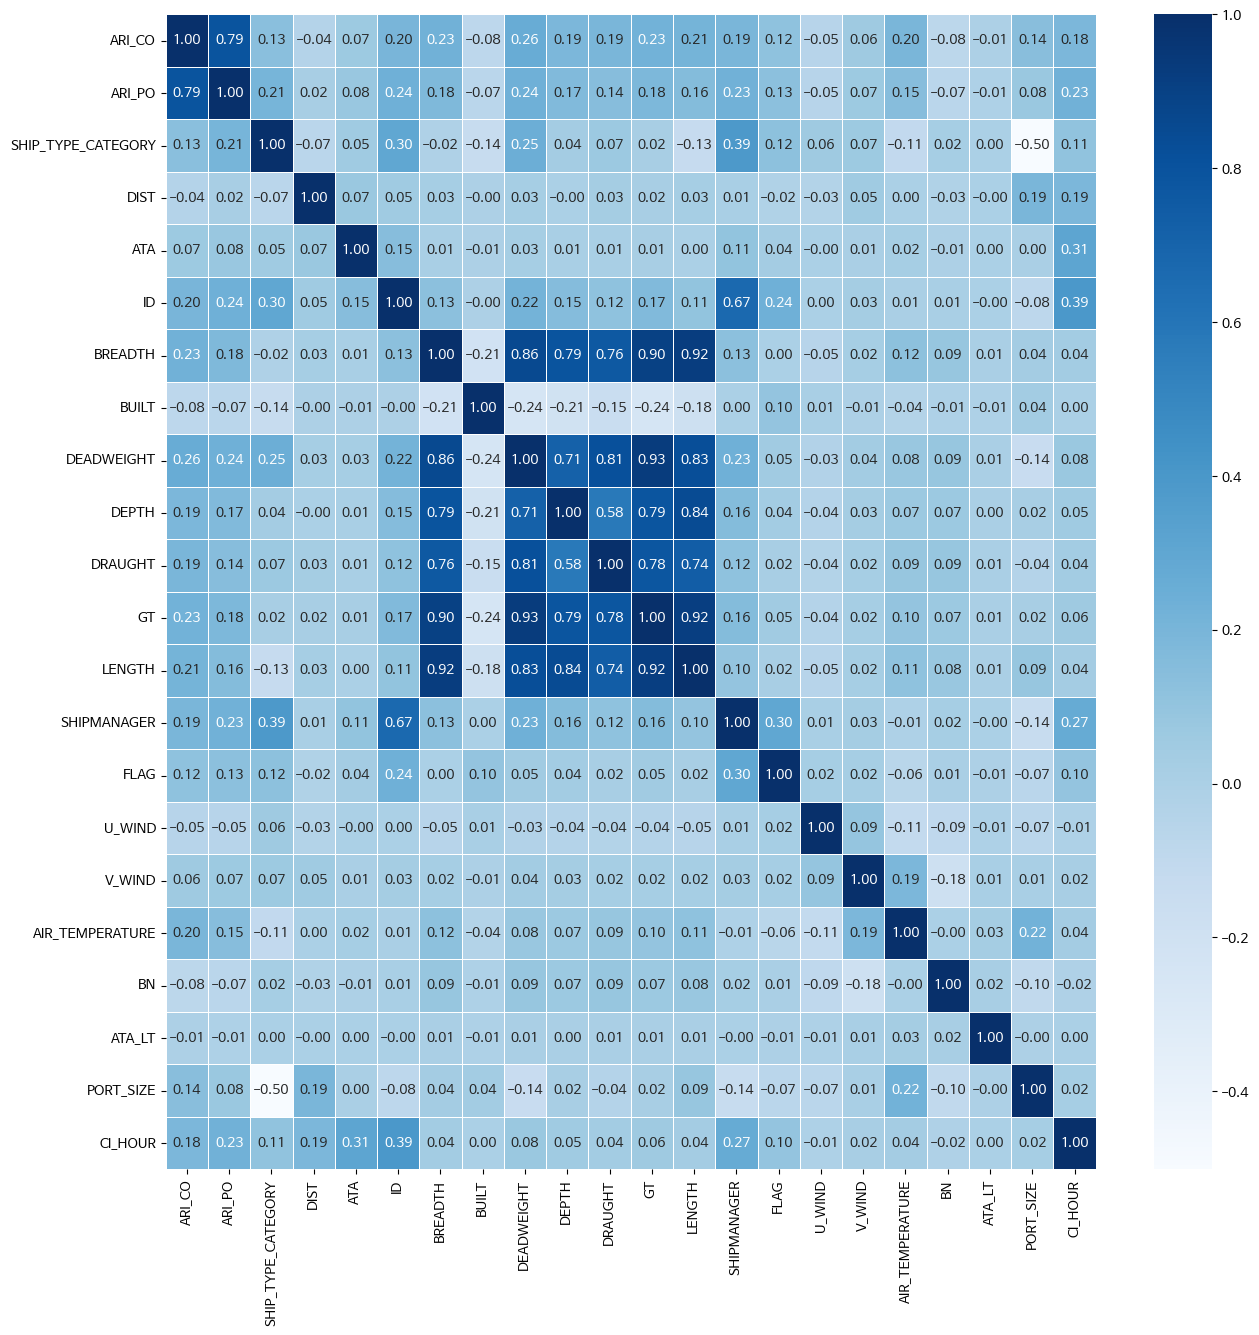

In [127]:
plt.figure(figsize=(15,15))
sns.heatmap(data = corr, annot=True,
            fmt = '.2f', linewidths=.5, cmap='Blues')

In [128]:
feature = corr.loc[abs(corr["CI_HOUR"]) > 0.02, "CI_HOUR"].sort_values()
feature

PORT_SIZE             0.020635
LENGTH                0.035334
AIR_TEMPERATURE       0.035827
DRAUGHT               0.040309
BREADTH               0.043711
DEPTH                 0.051760
GT                    0.059661
DEADWEIGHT            0.077954
FLAG                  0.097775
SHIP_TYPE_CATEGORY    0.111536
ARI_CO                0.184927
DIST                  0.189145
ARI_PO                0.231311
SHIPMANAGER           0.271326
ATA                   0.312529
ID                    0.392936
CI_HOUR               1.000000
Name: CI_HOUR, dtype: float64

cb 인코딩 전:


> PORT_SIZE          0.020635
LENGTH             0.035334
AIR_TEMPERATURE    0.035827
DRAUGHT            0.040309
BREADTH            0.043711
DEPTH              0.051760
GT                 0.059661
DEADWEIGHT         0.077954
DIST               0.189145
CI_HOUR            1.000000
Name: CI_HOUR, dtype: float64

cb 인코딩 후:
> PORT_SIZE             0.020635
LENGTH                0.035334
AIR_TEMPERATURE       0.035827
DRAUGHT               0.040309
BREADTH               0.043711
DEPTH                 0.051760
GT                    0.059661
DEADWEIGHT            0.077954
FLAG                  0.097775
SHIP_TYPE_CATEGORY    0.111536
ARI_CO                0.184927
DIST                  0.189145
ARI_PO                0.231311
SHIPMANAGER           0.271326
ATA                   0.312529
ID                    0.392936
CI_HOUR               1.000000

In [130]:
vec_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391939 entries, TRAIN_000000 to TRAIN_391938
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ARI_CO              391939 non-null  float64
 1   ARI_PO              391939 non-null  float64
 2   SHIP_TYPE_CATEGORY  391939 non-null  float64
 3   DIST                391939 non-null  float64
 4   ATA                 391939 non-null  float64
 5   ID                  391939 non-null  float64
 6   BREADTH             391938 non-null  float64
 7   BUILT               391939 non-null  int64  
 8   DEADWEIGHT          391939 non-null  int64  
 9   DEPTH               391938 non-null  float64
 10  DRAUGHT             391938 non-null  float64
 11  GT                  391939 non-null  int64  
 12  LENGTH              391938 non-null  float64
 13  SHIPMANAGER         391939 non-null  float64
 14  FLAG                391939 non-null  float64
 15  U_WIND              22

In [142]:
X = vec_X[feature[:-1].index].dropna()

In [143]:
X.head()

,PORT_SIZE,LENGTH,AIR_TEMPERATURE,DRAUGHT,BREADTH,DEPTH,GT,DEADWEIGHT,FLAG,SHIP_TYPE_CATEGORY,ARI_CO,DIST,ARI_PO,SHIPMANAGER,ATA,ID
SAMPLE_ID,,,,,,,,,,,,,,,,
TRAIN_000003,0.000356,120.0,6.7,10.0,20.0,10.0,5400,6910,54.750590,39.811498,42.957191,0.000000,45.563202,30.564686,61.940835,10.366799
TRAIN_000004,0.002615,300.0,25.6,10.0,50.0,20.0,96600,116000,68.481909,39.811498,109.030508,27.037650,109.030508,33.657756,61.940835,37.542065
TRAIN_000005,0.000103,290.0,28.1,20.0,40.0,20.0,94100,183000,60.407880,79.357145,98.058288,49.953585,89.944234,90.219995,61.940835,82.713000
TRAIN_000007,0.000990,200.0,28.6,10.0,30.0,20.0,29800,46600,42.570389,74.744620,22.436274,0.000000,23.273840,53.106063,61.940835,12.388167
TRAIN_000010,0.000520,180.0,25.6,10.0,30.0,20.0,22500,35000,72.368450,79.357145,46.104581,18.022495,18.720025,84.153113,61.940835,75.513567


In [144]:
raw_y.head()

SAMPLE_ID
TRAIN_000000      3.450000
TRAIN_000001      0.000000
TRAIN_000002      0.000000
TRAIN_000003      0.000000
TRAIN_000004    253.554444
Name: CI_HOUR, dtype: float64

In [145]:
y = raw_y[X.index]

In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227308 entries, TRAIN_000003 to TRAIN_391936
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PORT_SIZE           227308 non-null  float64
 1   LENGTH              227308 non-null  float64
 2   AIR_TEMPERATURE     227308 non-null  float64
 3   DRAUGHT             227308 non-null  float64
 4   BREADTH             227308 non-null  float64
 5   DEPTH               227308 non-null  float64
 6   GT                  227308 non-null  int64  
 7   DEADWEIGHT          227308 non-null  int64  
 8   FLAG                227308 non-null  float64
 9   SHIP_TYPE_CATEGORY  227308 non-null  float64
 10  ARI_CO              227308 non-null  float64
 11  DIST                227308 non-null  float64
 12  ARI_PO              227308 non-null  float64
 13  SHIPMANAGER         227308 non-null  float64
 14  ATA                 227308 non-null  float64
 15  ID                  22

In [147]:
y.info()

<class 'pandas.core.series.Series'>
Index: 227308 entries, TRAIN_000003 to TRAIN_391936
Series name: CI_HOUR
Non-Null Count   Dtype  
--------------   -----  
227308 non-null  float64
dtypes: float64(1)
memory usage: 3.5+ MB


### 데이터 정규화 등

In [148]:
from sklearn.preprocessing import Normalizer

# Normalizer 인스턴스 생성
normalizer = Normalizer(norm='l2')

X = normalizer.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


## 모델 설계 RF

랜덤포레스트 회귀 모델

결과: RMSE:  158.5770625385751

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=415)

In [150]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [151]:
# 모델 훈련
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [152]:
# 예측 수행
y_pred = reg.predict(X_test)

In [153]:
# Root Mean Squared Error (RMSE) 출력
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  140.9857686508502


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## XGBoost Regressor

In [89]:
from xgboost import XGBRegressor

In [91]:
# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# XGBoost 회귀 모델 생성
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [155]:
# 모델 훈련
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [156]:
# 예측 수행
y_pred = xgb_reg.predict(X_test)

In [157]:
# Root Mean Squared Error (RMSE) 출력
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  136.6084662443828


## GridSearchCV

In [158]:
from sklearn.model_selection import GridSearchCV

In [161]:
params = {'n_estimators': [100],
          'max_depth': [3, 5, 7, 9],
          'min_samples_leaf': [2, 4, 8, 16],
          'min_samples_split': [2, 4, 8, 16] }

reg = XGBRegressor(n_estimators=100)

grid_reg = GridSearchCV(reg, param_grid=params, cv=2, n_jobs=-1)  # -1 은 cpu를 다 쓴다는 의미
grid_reg.fit(X_train, y_train)

print(f"최적의 파라미터\n{grid_reg.best_params_}")
print(f"최고 예측 정확도: {grid_reg.best_score_}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:40:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


최적의 파라미터
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 정확도: 0.37141213734976586
